# Steps
This part explains what steps I have taken so far in order to scatter-plot one subject’s beta values as a function of spatial frequency.

In [143]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib as mpl
from PIL import Image
from sfp_nsdsyn import utils
rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'axes.linewidth': 1,
      'axes.labelpad': 6,
      'xtick.major.pad': 10,
      'xtick.major.width': 1,
      'ytick.major.width': 1,
      'lines.linewidth': 1,
      'font.size': 12,
      'axes.titlesize': 12,
      'axes.titleweight': 'bold',
      'axes.labelsize': 12,
      'xtick.labelsize': 10,
      'ytick.labelsize': 10,
      'legend.title_fontsize': 11,
      'legend.fontsize': 11,
      'figure.titlesize': 11,
      'figure.dpi': 72 * 3,
      'savefig.dpi': 72 * 4
      }
mpl.rcParams.update(rc)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



# Download the log polar stimuli description file from OSF and modify the dataframe

In [37]:
width, height = (1360, 714) #image size
# Calculate the coordinates for the center crop
left = (width - 714) // 2
top = (height - 714) // 2
right = left + 714
bottom = top + 714

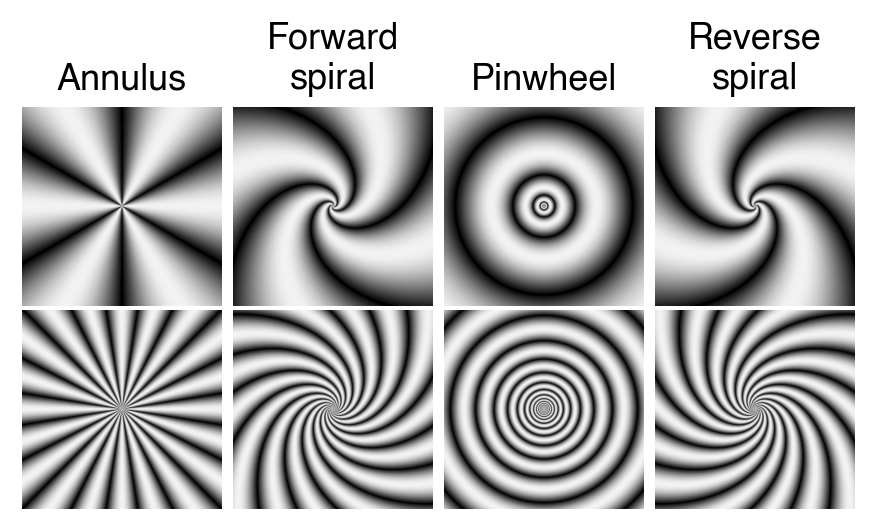

In [110]:
fig, axes = plt.subplots(2, 4, figsize=(5,2.47))
names = ['Annulus', 'Forward\nspiral', 'Pinwheel', 'Reverse\nspiral']
for i in range(4): 
    axes[0,i].set_title(f'{names[i]}')
    for kk, k in enumerate([0,2]):
        pic = os.path.join('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/stimuli/nsdsynthetic/nsdsynthetic', f'nsdsynthetic{105+k*4+i*24}.png')
        img = Image.open(pic).convert('L')        
        # Crop the image
        img_cropped = img.crop((left, top, right, bottom))
        axes[kk,i].imshow(img_cropped, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
        axes[kk,i].axis('off')

fig.subplots_adjust(wspace=0.04, hspace=0.02)
utils.save_fig('/Volumes/server/Projects/sfp_nsd/derivatives/figures/stimuli/nsd_synthetic_stimuli_fig1.svg')

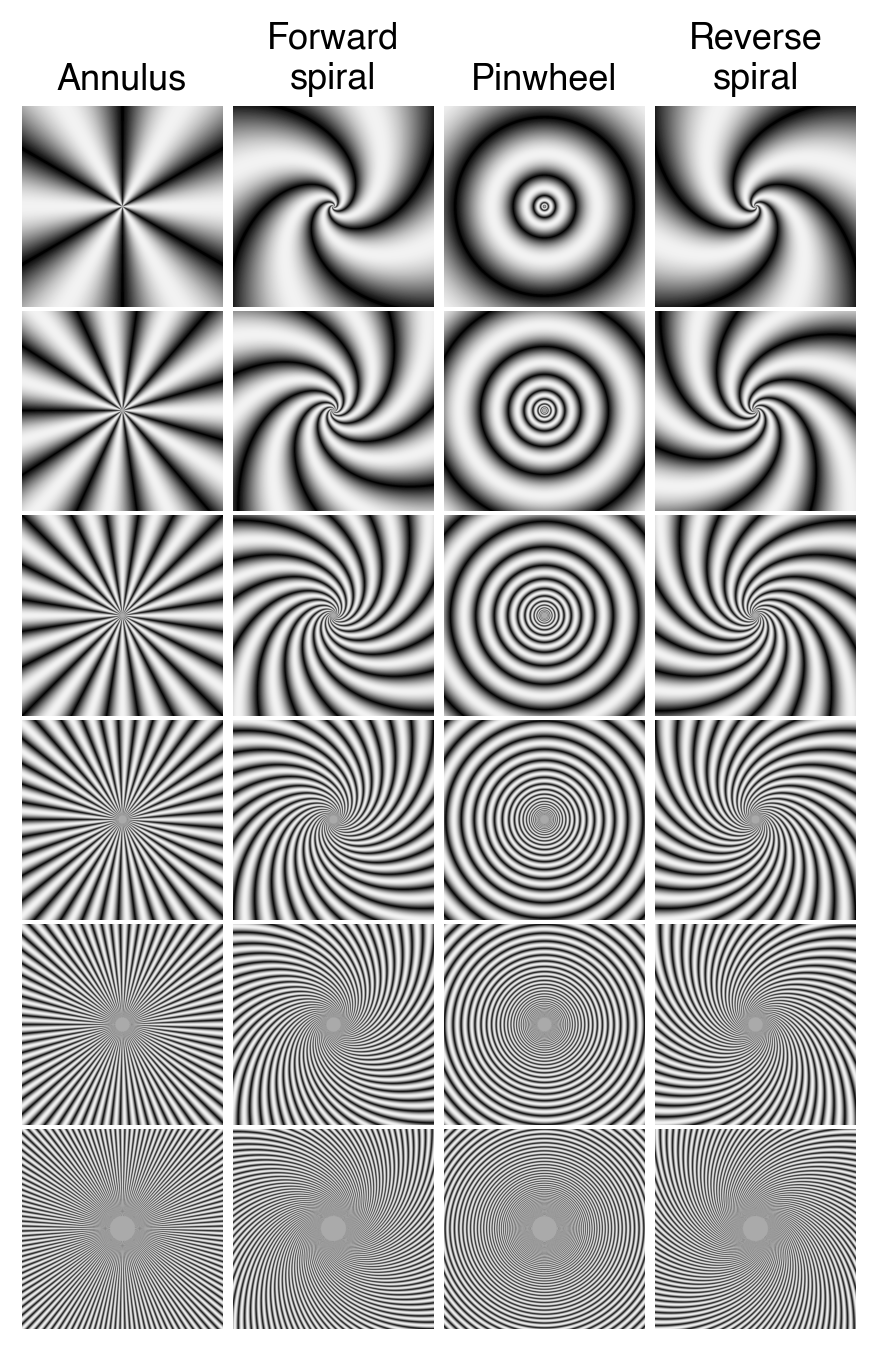

In [94]:
fig, axes = plt.subplots(6, 4, figsize=(5,7.5))
names = ['Annulus', 'Forward\nspiral', 'Pinwheel', 'Reverse\nspiral']
for i in range(4): 
    axes[0,i].set_title(f'{names[i]}')
    for k in range(6):
        pic = os.path.join('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/stimuli/nsdsynthetic/nsdsynthetic', f'nsdsynthetic{105+k*4+i*24}.png')
        img = Image.open(pic).convert('L')        
        # Crop the image
        img_cropped = img.crop((left, top, right, bottom))
        axes[k,i].imshow(img_cropped, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
        axes[k,i].axis('off')

fig.subplots_adjust(wspace=0.04, hspace=0.02)
utils.save_fig('/Volumes/server/Projects/sfp_nsd/derivatives/figures/stimuli/nsd_synthetic_stimuli_all.svg')

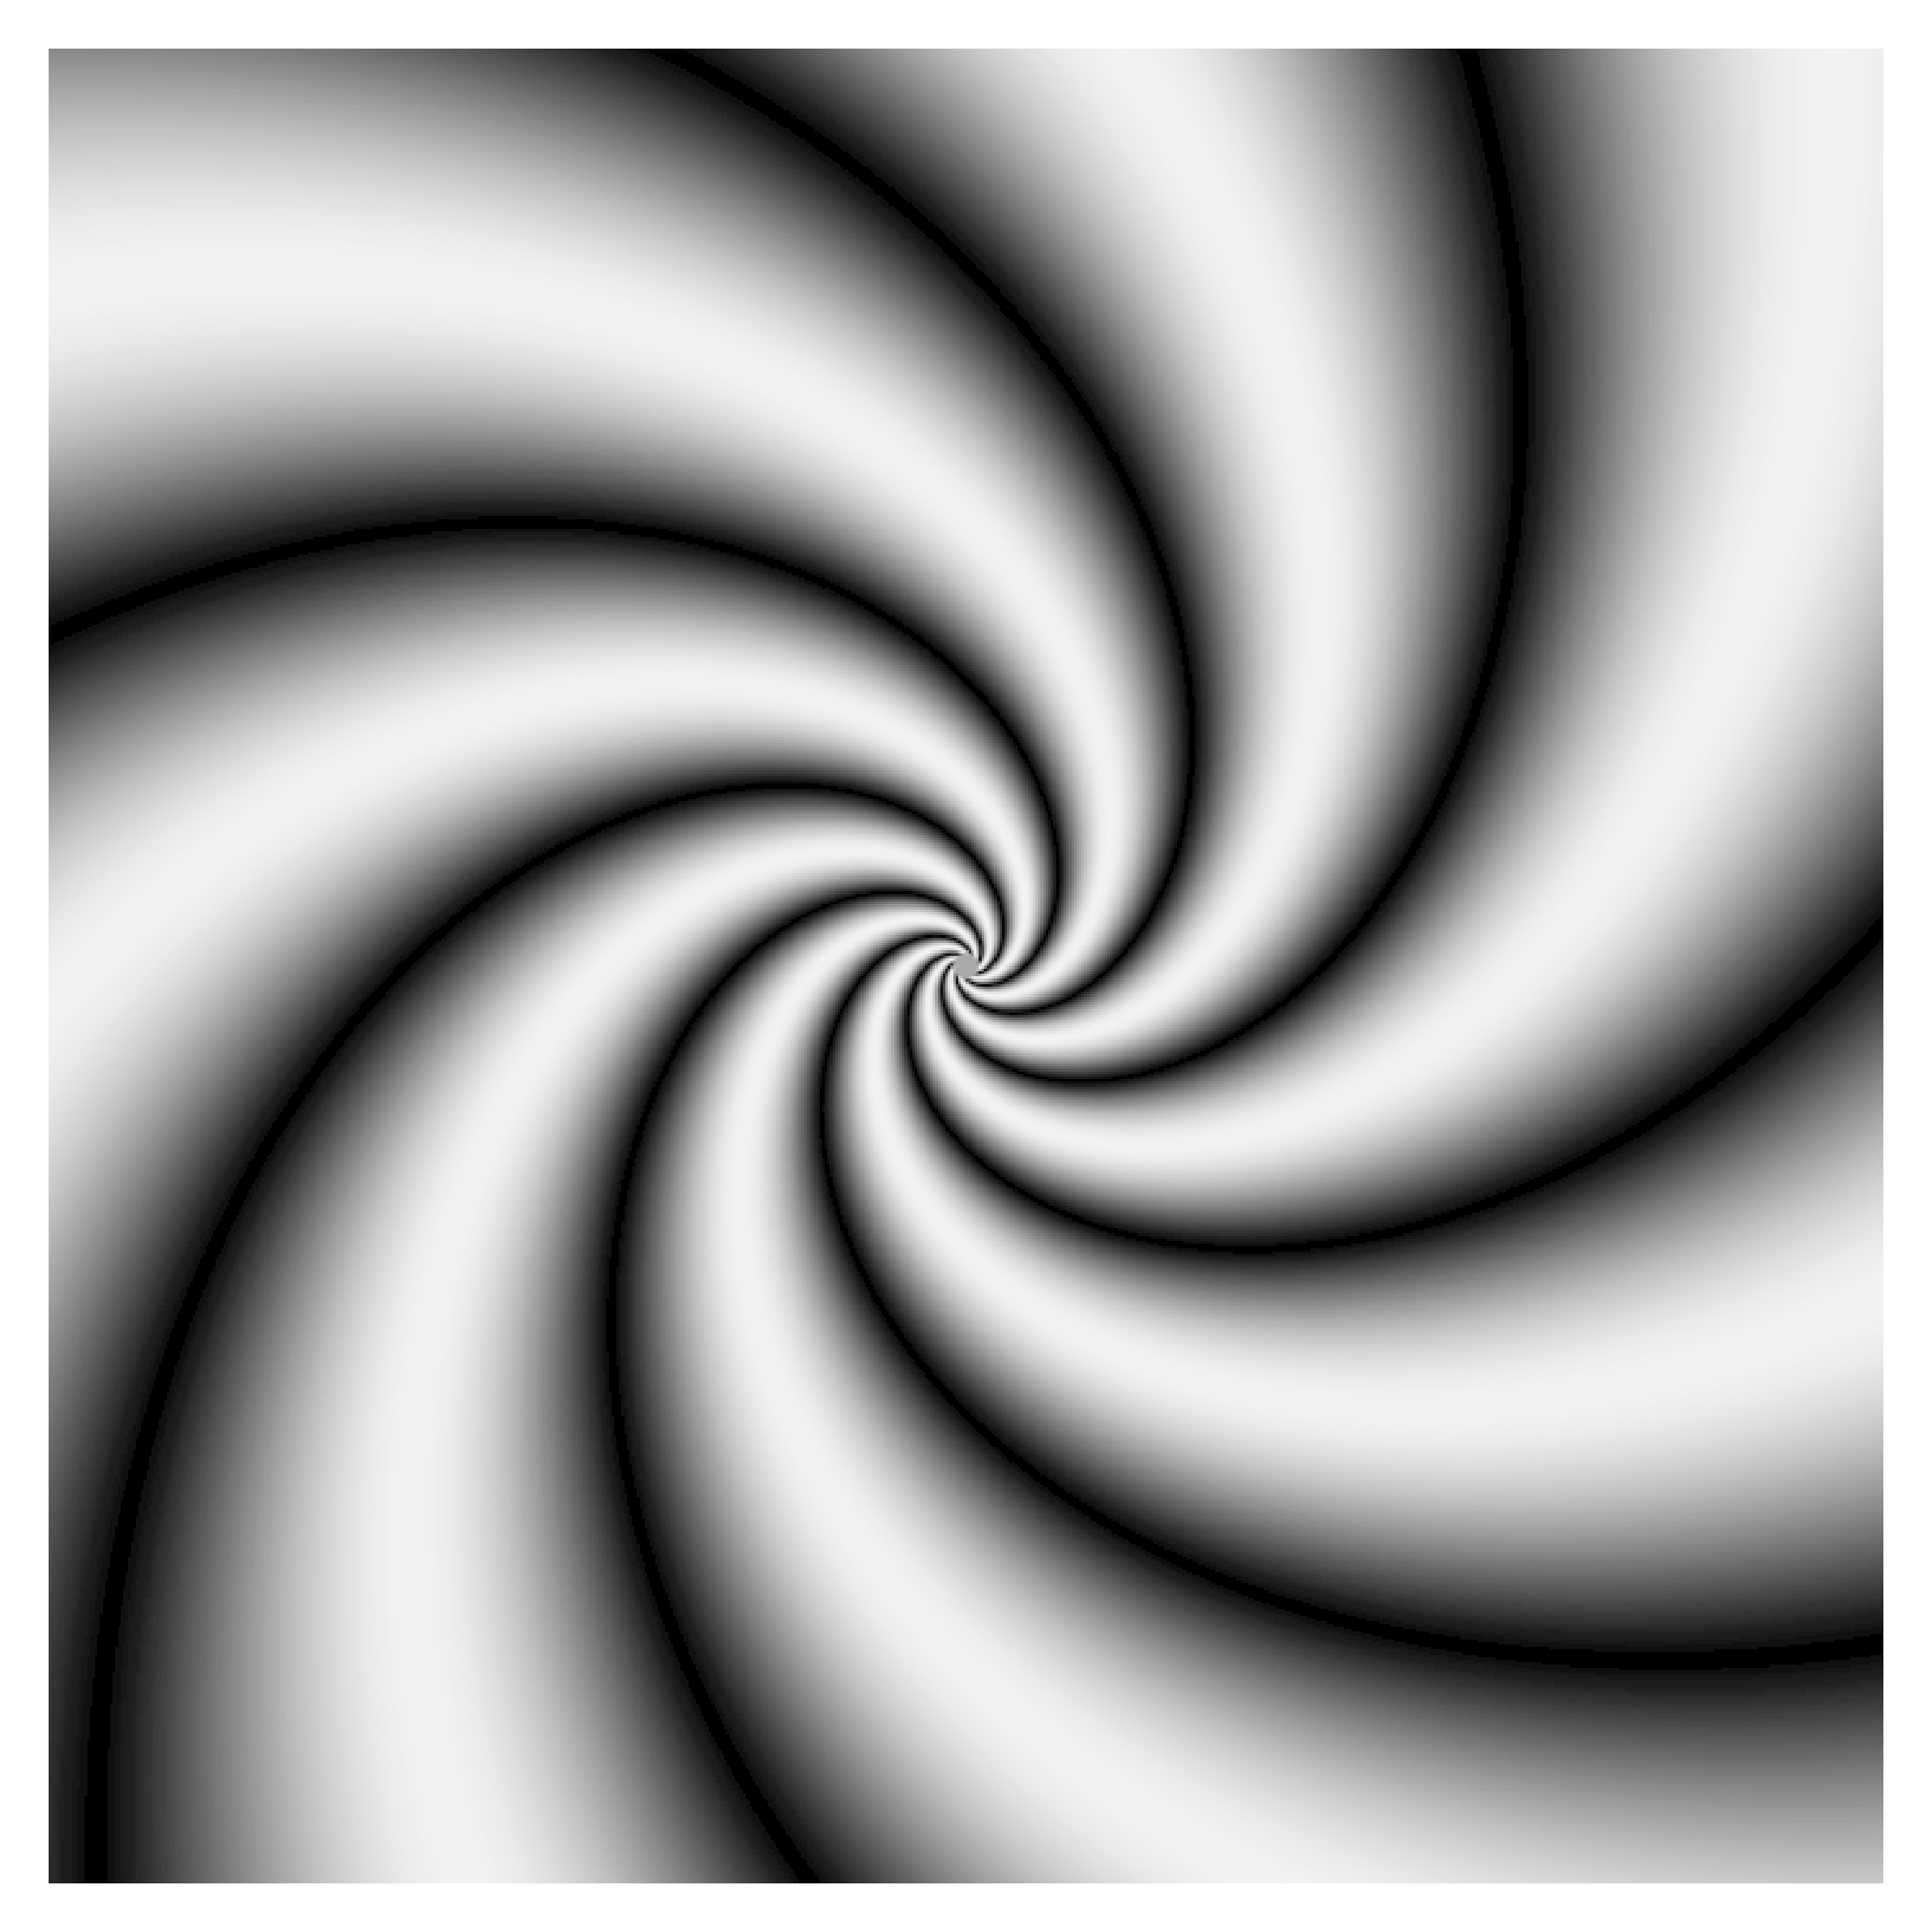

In [112]:
fig, ax = plt.subplots(1,1, figsize=(5,5), dpi=600)
names = ['Annulus', 'Forward\nspiral', 'Pinwheel', 'Reverse\nspiral']
for i in [1]: 
    for k in [1]:
        pic = os.path.join('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/stimuli/nsdsynthetic/nsdsynthetic', f'nsdsynthetic{105+k*4+i*24}.png')
        img = Image.open(pic).convert('L')        
        # Crop the image
        img_cropped = img.crop((left, top, right, bottom))
        ax.imshow(img_cropped, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
        ax.axis('off')

fig.subplots_adjust(wspace=0.04, hspace=0.02)
utils.save_fig('/Volumes/server/Projects/sfp_nsd/derivatives/figures/stimuli/highres_stim.svg')

In [113]:
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsyn_stim_description_corrected.csv')
stim_info = stim_info.drop_duplicates(subset=['class_idx'])

bd_stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/Broderick_dataset/broderick_stim_description_corrected.csv')
bd_stim_info = bd_stim_info.drop_duplicates(subset=['class_idx'])

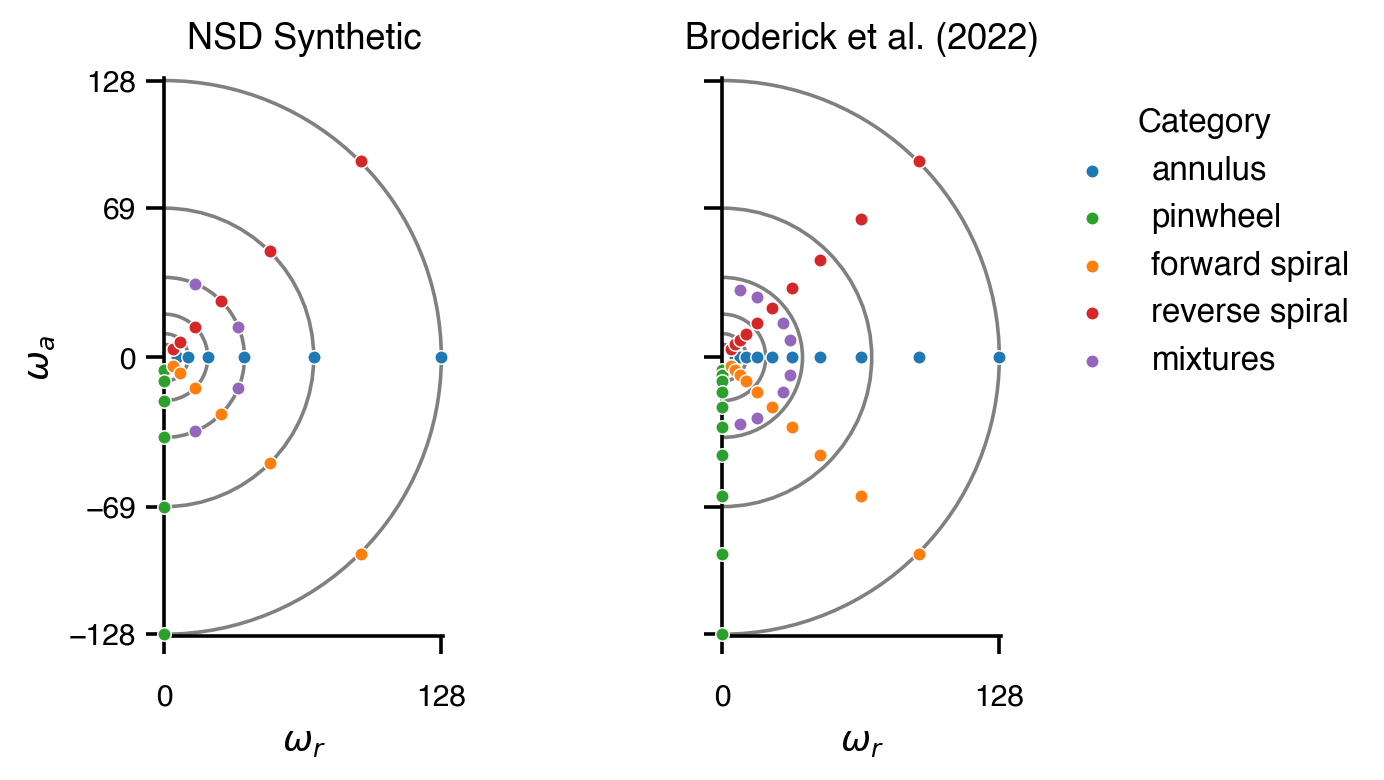

In [162]:
rc.update({'axes.linewidth': 1.2,
           'xtick.major.width': 1.2,
           'ytick.major.width': 1.2,
           'axes.labelpad': 4,
           'axes.titlepad': 10})
sns.set_theme(style="ticks", context='notebook', rc=rc, font_scale=1)
fig, axes = plt.subplots(1,2, sharey=True)
fig.set_size_inches(5, 5.5)
colors = [sns.color_palette('tab10', 10)[:][k] for k in [0,2,1,3,4]]
colors.append('gray')
for i, cat in enumerate(['annulus', 'pinwheel', 'forward spiral', 'reverse spiral', 'mixtures']):

    axes[0].scatter(stim_info.query(f'names == "{cat}"')['w_r'], 
                    stim_info.query(f'names == "{cat}"')['w_a'], label=cat, s=20, 
                    color=colors[i], edgecolors='w', linewidths=0.5, zorder=100, clip_on=False)
    axes[1].scatter(bd_stim_info.query(f'names == "{cat}"')['w_r'], 
                    bd_stim_info.query(f'names == "{cat}"')['w_a'], label=cat, s=20, 
                    color=colors[i], edgecolors='w', linewidths=0.5, zorder=100, clip_on=False)

radius_list = [6,11,20,37,69,128]  # Radius of the ring


for ax in axes:
    for radi in radius_list:
        circle1 = plt.Circle((0, 0), radi, linewidth=1.2, color='grey', clip_on=True, fill=False)
        ax.add_patch(circle1)    
    ax.set(xlim=(0, 129), ylim=(-129, 129), yticks=[-128,-69,0,69,128], xticks=[0, 128])
    #ax.legend(bbox_to_anchor=(1.1, 0.9), frameon=False, title='Category')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_aspect('equal')
    ax.set_xlabel(r"$\omega_r$")

fig.subplots_adjust(wspace=1)
axes[0].set_ylabel(r"$\omega_a$")
axes[1].set_ylabel('')
axes[0].set_title('NSD Synthetic')
axes[1].set_title('Broderick et al. (2022)')
axes[1].legend(bbox_to_anchor=(1.1, 1), frameon=False, title='Category')
utils.save_fig('/Volumes/server/Projects/sfp_nsd/derivatives/figures/stimuli/nsd_parameters.svg')



In [28]:
g.set_aspect('equal')

In [129]:
bd_stim_info

,w_r,w_a,phase,image_idx,class_idx,names,freq_lvl
0,0.0,-6.0,0.0,0,0,pinwheel,0
8,0.0,-8.0,0.0,8,1,pinwheel,1
16,0.0,-11.0,0.0,16,2,pinwheel,2
24,0.0,-16.0,0.0,24,3,pinwheel,3
32,0.0,-23.0,0.0,32,4,pinwheel,4
40,0.0,-32.0,0.0,40,5,pinwheel,5
48,0.0,-45.0,0.0,48,6,pinwheel,6
56,0.0,-64.0,0.0,56,7,pinwheel,7
64,0.0,-91.0,0.0,64,8,pinwheel,8
72,0.0,-128.0,0.0,72,9,pinwheel,9
